<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/8_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 3.1MB 57.9MB/s 
     |████████████████████████████████| 501kB 51.2MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
X_train.shape, y_train.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000,))

In [0]:
print(set(y_train))
K = len(set(y_train))
print("Number of Classes: ", K)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of Classes:  10


In [0]:
X_train[0].shape

(32, 32, 3)

In [0]:
i = Input(shape = X_train[0].shape)
x = Conv2D(filters = 32, kernel_size= (3,3), strides = 2, activation = "relu")(i)
x = Conv2D(filters = 64, kernel_size= (3,3), strides = 2, activation = "relu")(x)
x = Conv2D(filters = 128, kernel_size= (3,3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 744us/sample - loss: 1.5017 - accuracy: 0.4538 - val_loss: 1.2425 - val_accuracy: 0.5467
Epoch 2/10
50000/50000 [==============================] - 37s 730us/sample - loss: 1.1605 - accuracy: 0.5873 - val_loss: 1.0636 - val_accuracy: 0.6157
Epoch 3/10
50000/50000 [==============================] - 37s 739us/sample - loss: 1.0016 - accuracy: 0.6433 - val_loss: 1.0287 - val_accuracy: 0.6364
Epoch 4/10
50000/50000 [==============================] - 37s 732us/sample - loss: 0.8855 - accuracy: 0.6853 - val_loss: 0.9150 - val_accuracy: 0.6802
Epoch 5/10
50000/50000 [==============================] - 37s 733us/sample - loss: 0.7828 - accuracy: 0.7210 - val_loss: 0.8811 - val_accuracy: 0.6947
Epoch 6/10
50000/50000 [==============================] - 37s 746us/sample - loss: 0.6936 - accuracy: 0.7542 - val_loss: 0.8832 - val_accuracy: 0.6899
Epoch 7/10
50000/50000 [====================

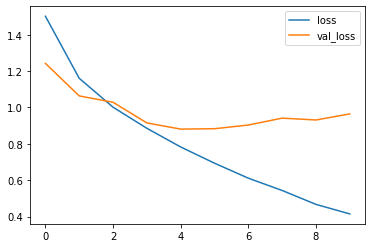

In [0]:
# loss per iteration
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

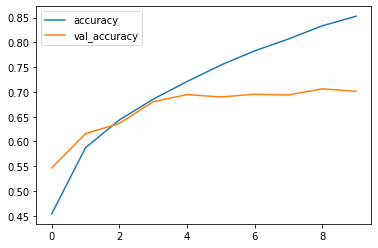

In [0]:
# accuracy per iteration
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()

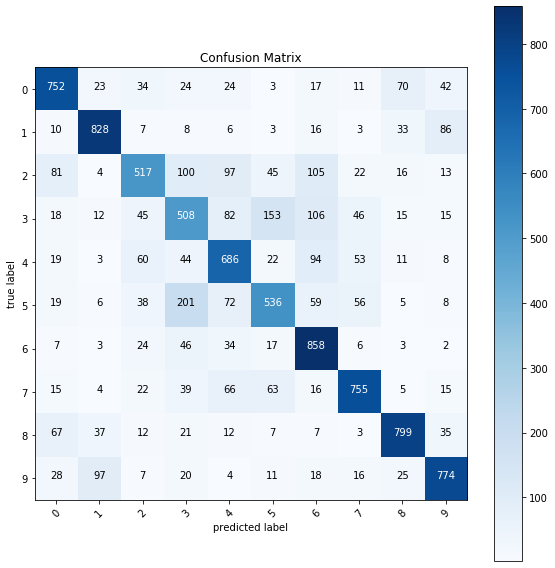

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title = "Confusion Matrix", cmap = plt.cm.Blues):
  plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation="nearest", cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], "d"),
             horizontalalignment = "center", 
             color = "white" if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel("true label")
  plt.xlabel("predicted label")
  plt.show()

ptest = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, ptest)
plot_confusion_matrix(cm, list(range(K)))

In [0]:
labels = """Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck""".split(",")
reference = [(i, item) for i, item in zip(range(len(labels)), labels)]
reference

[(0, 'Airplane'),
 (1, 'Automobile'),
 (2, 'Bird'),
 (3, 'Cat'),
 (4, 'Deer'),
 (5, 'Dog'),
 (6, 'Frog'),
 (7, 'Horse'),
 (8, 'Ship'),
 (9, 'Truck')]

Text(0.5, 1.0, 'True label: Bird, Predicted: Horse')

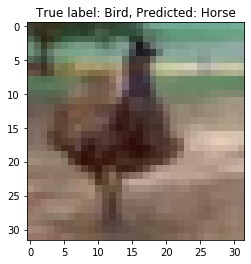

In [0]:
misclassified_idx = np.where(ptest != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap = "gray")
plt.title(f"True label: {labels[y_test[i]]}, Predicted: {labels[ptest[i]]}")